In [1]:
from PIL import Image
import matplotlib.pyplot as plt
from scipy.linalg import svd
import numpy as np

In [2]:
def read_image(file_path):
    '''读取图片'''
    img = Image.open(file_path)
    # 灰度化
    np_img = np.array(img.convert('L'), 'f')
    plt.imshow(np_img, cmap=plt.cm.gray, interpolation='nearest')
    plt.savefig('gray.png')
    return np_img

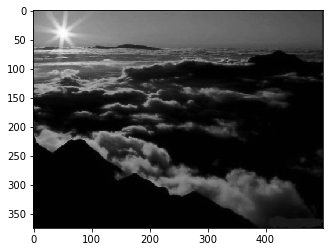

In [3]:
file_path = 'sun.jpg'                # 图片路径
np_img = read_image(file_path)       # 读取图片

In [4]:
def image_reconstruction(img, K):
    '''利用SVD实现图片重构'''
    p, s, q = svd(img, full_matrices=False)
    
    # 选择前K个特征
    s_temp = np.zeros(s.shape[0])
    s_temp[:K] = s[:K]
    s_K = np.identity(s.shape[0]) * s_temp
    
    # 重构图片
    re_img = p.dot(s_K).dot(q)
    
    # 绘制
    plt.imshow(re_img, cmap=plt.cm.gray, interpolation='nearest')
    plt.savefig(str(K)+'.png')
    plt.show()
    return None

-------------------- K=5 --------------------


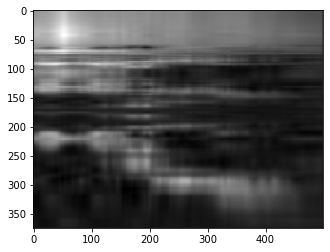

-------------------- K=50 --------------------


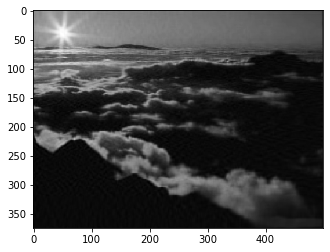

-------------------- K=100 --------------------


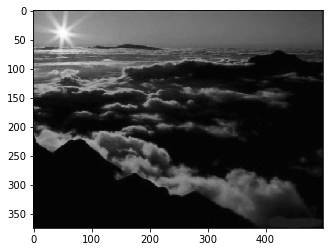

In [5]:
# 保留前K个特征进行图片重构
print('-'*20, 'K=5','-'*20)
image_reconstruction(np_img, K=5)
print('-'*20, 'K=50','-'*20)
image_reconstruction(np_img, K=50)
print('-'*20, 'K=100','-'*20)
image_reconstruction(np_img, K=100)

总结： 可以观察到，只保留前100个特征时，视觉上与原图看不出什么差别，说明SVD是对图片进行降维的一种有效方式